### Example 01 : SKLearn Linear Regression

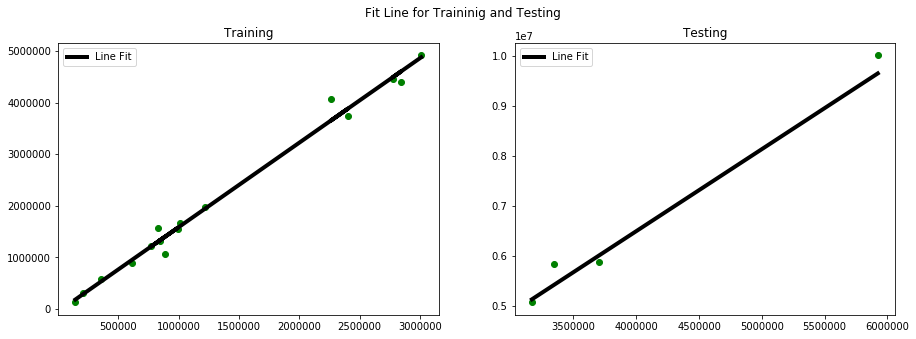

In [25]:
# Read the data from the file

filename = "VehiclesItaly.txt"

X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)
        
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

import numpy as np

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])


# Create linear regression object
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
# Train the model using the training sets
linear_regressor.fit(X_train, y_train)
# Predict the output
y_train_pred = linear_regressor.predict(X_train)

y_test_pred = linear_regressor.predict(X_test)


# Plot outputs
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Fit Line for Traininig and Testing')

ax[0].set_title("Training")
ax[0].scatter(X_train, y_train, color='green')
ax[0].plot(X_train, y_train_pred, color='black',label="Line Fit",linewidth=4)
ax[0].legend()

ax[1].set_title("Testing")
ax[1].scatter(X_test, y_test, color='green')
ax[1].plot(X_test, y_test_pred, color='black',label="Line Fit",linewidth=4)
ax[1].legend()

### Get 'Coefficients' and 'intercept_' Values

In [33]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
boston_X = boston.data
y = boston.target

lr = LinearRegression()

lr.fit(boston_X,y)

print("Linear Regressoion Coefficients:",lr.coef_)

print("Linear Regressoion Intercept:",lr.intercept_)

Linear Regressoion Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Linear Regressoion Intercept: 36.45948838509001


### Tuning 'fit_intercept' parameter 

Intercept when fit_intercept=True : 96.27782
Intercept when fit_intercept=False : 0.00000


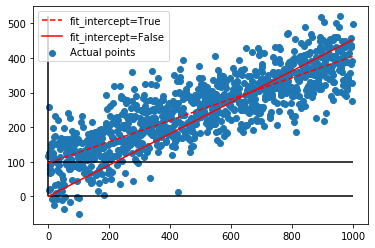

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

bias = 100

X = np.arange(1000).reshape(-1,1)
y_true = np.ravel(X.dot(0.3) + bias)
noise = np.random.normal(0, 60, 1000)
y = y_true + noise

lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_false = LinearRegression(fit_intercept=False)

lr_fi_true.fit(X, y)
lr_fi_false.fit(X, y)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))

lr_fi_true_yhat = np.dot(X, lr_fi_true.coef_) + lr_fi_true.intercept_
lr_fi_false_yhat = np.dot(X, lr_fi_false.coef_) + lr_fi_false.intercept_

plt.scatter(X, y, label='Actual points')
plt.plot(X, lr_fi_true_yhat, 'r--', label='fit_intercept=True')
plt.plot(X, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()

plt.vlines(0, 0, y.max())
plt.hlines(bias, X.min(), X.max())
plt.hlines(0, X.min(), X.max())

plt.show()

In [ ]:
# Comparing Linear Regression and Ridge Regression

In [37]:
from sklearn.linear_model import RidgeCV
rg = RidgeCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025))
rg.fit(diabetes.data,diabetes.target)
rg.alpha_


from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import cross_val_score

diabetes = load_diabetes()

lr = LinearRegression(normalize=True)
rg = Ridge(0.001,normalize=True)

lr_score = cross_val_score(lr,diabetes.data,diabetes.target,cv=10)
print(lr_score.mean())

rg_score = cross_val_score(rg,diabetes.data,diabetes.target,cv=10)
print(rg_score.mean())

# finding the right coefficeints for alpha(Ridge Coefficient) is not simple.
# RidgeCV provides a class Automatic grid search

from sklearn.linear_model import RidgeCV
rg = RidgeCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025))
rg.fit(diabetes.data,diabetes.target)
rg.alpha_

0.4619623619583372
0.4622717469239128


0.005